<a href="https://colab.research.google.com/github/LizcanoJuan1010/Machine-Learning-Projects/blob/main/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TEMAS DE OPTIMIZACION LINEAL
##Proyecto final - Inversión en un portafolio de capitles
###Integrantes:

*   Federico García Gutiérrez
*   Juan José Lizcano
*   Mariana Herrera



## Introducción
En este proyecto se plantea la maximización del ROI para crear un fondo de inversión seleccionando las 5 mejores compañías.

# VAMOS A SUPONER QUE se van A INVERTIR 1000 DÓLARES

* El propósito es buscar la combinación de estas 5 mejores empresas para maximizar las ganancias, es decir, los porcentajes del total de capital que debemos tener de cada una.
* Entonces, la suma de las proporciones de cada empresa debe ser igual a 1.
* Primero vamos a calcular el ROI de cada acción según su historial. En este orden de ideas, vamos a calcular el ROI de cada año desde 2014 hasta 2024 y vamos a agrupar esta información en un dataframe con el símbolo y el ROI de los últimos 10 años.
* Vamos a ver el historial del S&P 500 y vamos a analizar su comportamiento, comparándolo con el presente año. Así, asignaremos una probabilidad a cada año de que el comportamiento del presente año sea similar a los años anteriores.

Año 1 -> 0.08  
Año 2 -> 0.01  
Año 3 -> 0.01  
Año 4 -> 0.07  
Año 5 -> 0.03  
Año 6 -> 0.1  
Año 7 -> 0.25  
Año 8 -> 0.05  
Año 9 -> 0.2  
Año 10 -> 0.1  


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.linear_model import SGDRegressor

In [ ]:
stock = pd.read_csv('/content/sp500_stocks.csv')
index = pd.read_csv('SP500_INDEX.csv')

In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813315 entries, 0 to 1813314
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Symbol     object 
 2   Adj Close  float64
 3   Close      float64
 4   High       float64
 5   Low        float64
 6   Open       float64
 7   Volume     float64
dtypes: float64(6), object(2)
memory usage: 110.7+ MB


In [ ]:
stock.describe().T

,count,mean,std,min,25%,50%,75%,max
Adj Close,1726236.0,9.700341e+01,2.009471e+02,0.70,29.520521,5.393000e+01,1.031449e+02,8.099960e+03
Close,1726236.0,1.039552e+02,2.009117e+02,0.70,35.240002,6.231000e+01,1.123400e+02,8.099960e+03
High,1726236.0,1.050976e+02,2.032704e+02,0.71,35.630001,6.293232e+01,1.135100e+02,8.211400e+03
Low,1726236.0,1.027554e+02,1.984823e+02,0.65,34.830002,6.163000e+01,1.111200e+02,8.010000e+03
Open,1726236.0,1.039352e+02,2.008405e+02,0.70,35.236794,6.229000e+01,1.123300e+02,8.097980e+03
Volume,1726236.0,5.898136e+06,1.980288e+07,0.00,988800.000000,2.138350e+06,4.881946e+06,1.880998e+09


In [ ]:
stock.head(9750446)


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,40.835041,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,40.579269,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,41.154755,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,41.184265,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,41.474457,70.501671,70.501671,69.648827,69.974915,4073337.0
...,...,...,...,...,...,...,...,...
1813310,2024-04-24,ZTS,150.880005,150.880005,151.740005,148.750000,149.250000,3640300.0
1813311,2024-04-25,ZTS,153.360001,153.360001,153.589996,150.039993,150.970001,4567200.0
1813312,2024-04-26,ZTS,158.419998,158.419998,158.740005,152.630005,152.630005,4969500.0
1813313,2024-04-29,ZTS,159.699997,159.699997,165.039993,158.419998,158.419998,4849500.0


In [ ]:
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   S&P500  2517 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB


In [ ]:
index.describe().T

,count,mean,std,min,25%,50%,75%,max
S&P500,2517.0,3110.350266,944.568703,1829.08,2180.39,2859.53,3992.93,5254.35


In [ ]:
index.head(5)

,Date,S&P500
0,2014-05-01,1883.68
1,2014-05-02,1881.14
2,2014-05-05,1884.66
3,2014-05-06,1867.72
4,2014-05-07,1878.21


In [ ]:
# Convertir la columna de fechas a tipo datetime
stock['Date'] = pd.to_datetime(stock['Date'])

# Filtrar los datos para los últimos 10 años
ultimos_10_anios = stock[stock['Date'] >= stock['Date'].max() - pd.DateOffset(years=10)]

# Definir una función para calcular el ROI
def calcular_roi(datos):
    return (datos['Close'].iloc[-1] - datos['Open'].iloc[0]) / datos['Open'].iloc[0]

# Calcular el ROI para cada año y empresa
roi_por_anio_y_empresa = ultimos_10_anios.groupby([ultimos_10_anios['Date'].dt.year, 'Symbol']).apply(calcular_roi)

print(roi_por_anio_y_empresa)

Date  Symbol
2014  A         0.071198
      AAL       0.503083
      AAPL      0.303759
      ABBV      0.273647
      ABNB           NaN
                  ...   
2024  XYL       0.155002
      YUM       0.088800
      ZBH      -0.006115
      ZBRA      0.171284
      ZTS      -0.186680
Length: 5533, dtype: float64


In [ ]:
# Convertir la columna de fechas a tipo datetime
stock['Date'] = pd.to_datetime(stock['Date'])

# Filtrar los datos para los últimos 10 años
ultimos_10_anios = stock[stock['Date'] >= stock['Date'].max() - pd.DateOffset(years=10)]

# Definir una función para calcular el ROI
def calcular_roi(datos):
    return (datos['Close'].iloc[-1] - datos['Open'].iloc[0]) / datos['Open'].iloc[0]

# Calcular el ROI para cada año y empresa
roi_por_anio_y_empresa = ultimos_10_anios.groupby([ultimos_10_anios['Date'].dt.year, 'Symbol']).apply(calcular_roi)

# Convertir el resultado a un DataFrame
df_roi = roi_por_anio_y_empresa.reset_index()
df_roi.columns = ['Year', 'Symbol', 'ROI']

print(df_roi)

      Year Symbol       ROI
0     2014      A  0.071198
1     2014    AAL  0.503083
2     2014   AAPL  0.303759
3     2014   ABBV  0.273647
4     2014   ABNB       NaN
...    ...    ...       ...
5528  2024    XYL  0.155002
5529  2024    YUM  0.088800
5530  2024    ZBH -0.006115
5531  2024   ZBRA  0.171284
5532  2024    ZTS -0.186680

[5533 rows x 3 columns]


In [ ]:
# Pivotar los datos para tener los años como columnas
df_pivot = df_roi.pivot(index='Symbol', columns='Year', values='ROI')

df_pivot.head(10000000)

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Symbol,,,,,,,,,,,
A,0.071198,0.015299,0.109596,0.458088,0.000593,0.282857,0.379395,0.342273,-0.058805,-0.085088,-0.008322
AAL,0.503083,-0.219786,0.130782,0.100465,-0.386394,-0.088366,-0.455832,0.133123,-0.302249,0.064291,-0.010256
AAPL,0.303759,-0.055032,0.128740,0.461399,-0.072990,0.895862,0.791656,0.329913,-0.269358,0.477817,-0.089874
ABBV,0.273647,-0.094743,0.078539,0.537031,-0.050957,-0.029592,0.202851,0.263295,0.193486,-0.043631,0.049968
ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102656,-0.482749,0.557933,0.179573
...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.024764,-0.049479,0.378619,0.365365,-0.021844,0.199056,0.285877,0.175341,-0.080193,0.022167,0.155002
YUM,-0.052419,-0.005311,0.235166,0.283984,0.118929,0.105829,0.075917,0.273711,-0.074433,0.017443,0.088800
ZBH,0.162447,-0.101742,0.020570,0.161741,-0.142810,0.454333,0.027404,-0.183915,0.031213,-0.044816,-0.006115


In [ ]:
df_pivot.info()
df_pivot

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, A to ZTS
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2014    469 non-null    float64
 1   2015    476 non-null    float64
 2   2016    481 non-null    float64
 3   2017    484 non-null    float64
 4   2018    487 non-null    float64
 5   2019    489 non-null    float64
 6   2020    494 non-null    float64
 7   2021    497 non-null    float64
 8   2022    497 non-null    float64
 9   2023    499 non-null    float64
 10  2024    501 non-null    float64
dtypes: float64(11)
memory usage: 47.2+ KB


Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Symbol,,,,,,,,,,,
A,0.071198,0.015299,0.109596,0.458088,0.000593,0.282857,0.379395,0.342273,-0.058805,-0.085088,-0.008322
AAL,0.503083,-0.219786,0.130782,0.100465,-0.386394,-0.088366,-0.455832,0.133123,-0.302249,0.064291,-0.010256
AAPL,0.303759,-0.055032,0.128740,0.461399,-0.072990,0.895862,0.791656,0.329913,-0.269358,0.477817,-0.089874
ABBV,0.273647,-0.094743,0.078539,0.537031,-0.050957,-0.029592,0.202851,0.263295,0.193486,-0.043631,0.049968
ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102656,-0.482749,0.557933,0.179573
...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.024764,-0.049479,0.378619,0.365365,-0.021844,0.199056,0.285877,0.175341,-0.080193,0.022167,0.155002
YUM,-0.052419,-0.005311,0.235166,0.283984,0.118929,0.105829,0.075917,0.273711,-0.074433,0.017443,0.088800
ZBH,0.162447,-0.101742,0.020570,0.161741,-0.142810,0.454333,0.027404,-0.183915,0.031213,-0.044816,-0.006115


In [ ]:
companies = pd.read_csv('SP500_COMPANIES.csv', encoding='latin1',names=['Exchange', 'Symbol', 'Shortname','Longname', 'Sector','Industry','Currentprice','Marketcap','Ebitda','Revenuegrowth','City','State','Country','Fulltimeemployees'])
companies = companies.iloc[1:]


In [ ]:
companies.head(6)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,389.33,2893620969472,1.25182E+11,0.17,Redmond,WA,United States,221000
2,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,170.33,2630218678272,1.30109E+11,0.021,Cupertino,CA,United States,161000
3,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,864.02,2160050044928,34480001024,2.653,Santa Clara,CA,United States,29600
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,164.64,2023046905856,1.09723E+11,0.154,Mountain View,CA,United States,180895
5,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,162.78,2021271797760,1.09723E+11,0.154,Mountain View,CA,United States,180895
6,NMS,AMZN,Amazon.com Inc.,Amazon.com Inc.,Consumer Cyclical,Internet Retail,175.0,1820472508416,85515001856,0.139,Seattle,WA,United States,1525000


In [ ]:
from pickle import NONE
stock['Date'] = pd.to_datetime(stock['Date'])
def TOTALROI(code):
    val1 = None
    val2 = None
    for index, row in stock.iterrows():
        if row['Symbol'] == code:
            if row['Date'] == stock['Date'].min():
                val1 = row['Open']
            if row['Date'] == stock['Date'].max():
                val2 = row['Close']
    if val1 is not None and val2 is not None:
        ROI = (val2 - val1) / val1
        return ROI
    else:
        print("No se encontraron valores para el código especificado")
        return None



In [ ]:
# Convertir la columna de fechas a tipo datetime
stock['Date'] = pd.to_datetime(stock['Date'])

# Filtrar los datos para los últimos 10 años
ultimos_10_anios = stock[stock['Date'] >= stock['Date'].max() - pd.DateOffset(years=10)]

# Definir una función para calcular el ROI total
def calcular_roi_total(datos):
    return (datos['Close'].max() - datos['Open'].min()) / datos['Open'].min()

# Calcular el ROI total para cada empresa en los últimos 10 años
roi_total_por_empresa = ultimos_10_anios.groupby('Symbol').apply(calcular_roi_total)

print(roi_total_por_empresa)


Symbol
A        4.403255
AAL      5.667047
AAPL     8.489650
ABBV     2.685489
ABNB     1.613475
          ...    
XYL      3.527058
YUM      2.029313
ZBH      1.215730
ZBRA    12.039465
ZTS      7.275712
Length: 503, dtype: float64


In [ ]:
roi_total_por_empresa.head(300)

Symbol
A       4.403255
AAL     5.667047
AAPL    8.489650
ABBV    2.685489
ABNB    1.613475
          ...   
MA      5.984563
MAA     2.501832
MAR     3.513792
MAS     3.582207
MCD     2.412399
Length: 300, dtype: float64

In [ ]:
# Ordenar el Series por ROI en orden descendente
top_10_roi_empresas = roi_total_por_empresa.sort_values(ascending=False)

# Obtener las 10 primeras empresas con el mayor ROI
top_10_empresas = top_10_roi_empresas.head(10)

print(top_10_empresas)


Symbol
ENPH    479.000008
NVDA    223.458359
AMD     129.481484
SMCI    101.863197
ETSY     45.610676
PAYC     43.832251
BLDR     42.262293
TSLA     42.209318
MRNA     38.516313
CZR      31.294594
dtype: float64


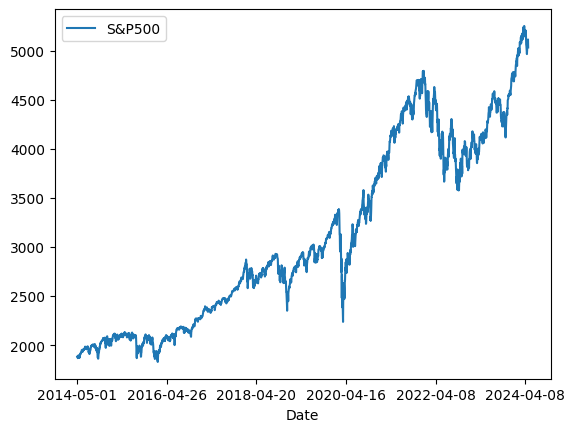

In [ ]:
# prompt: Crea una grafica que muestra el valor de s&p500 a lo largo del tiempo, que esta en del dataframe index

import matplotlib.pyplot as plt
index.plot(x='Date', y='S&P500', kind='line')
plt.show()


In [ ]:
# prompt: Agrega en un diccionario el codigo  y  el ROI de cada empresa tomando la fecha minima - la fecha actual

import datetime

# Define el rango de fechas
fecha_minima = datetime.datetime(2010, 1, 1)
fecha_actual = datetime.datetime.now()

# Crea un diccionario para almacenar los datos
roi_por_empresa = {}
# Itera sobre las empresas
for empresa in companies['Symbol']:
    # Filtra los datos de la empresa
    datos_empresa = stock[stock['Symbol'] == empresa]

    # Verifica si hay suficientes datos para calcular el ROI
    if len(datos_empresa) >= 2:
        # Calcula el ROI
        roi = (datos_empresa['Close'].iloc[-1] - datos_empresa['Close'].iloc[0]) / datos_empresa['Close'].iloc[0]
    else:
        # Usa np.nan como valor de ROI si no hay suficientes datos
        roi = np.nan

    # Agrega el ROI al diccionario
    roi_por_empresa[empresa] = roi

In [ ]:
# Imprime el diccionario
print(roi_por_empresa)

{'MSFT': 11.579320742326512, 'AAPL': 21.285127277577576, 'NVDA': 185.91617744222378, 'GOOG': 9.546923662380758, 'GOOGL': 9.378442692441672, 'AMZN': 25.13890896384748, 'META': nan, 'BRK-B': 4.991090360510199, 'LLY': 20.806252993877102, 'AVGO': 67.94326497622592, 'TSLA': nan, 'JPM': 3.474679400723058, 'V': 11.19015145049385, 'WMT': 2.2832377724645414, 'XOM': 0.7103397546391186, 'UNH': 14.340945184688874, 'MA': 16.567357574325445, 'PG': 1.6701570647951183, 'JNJ': 1.2354668468719896, 'HD': 10.6574816997317, 'MRK': 2.6590804189213495, 'COST': 11.167985629872913, 'ORCL': 3.5774647184642165, 'CVX': 1.0398432741278403, 'BAC': 1.3588272346294774, 'ABBV': nan, 'KO': 1.1658485086366377, 'CRM': 13.377973992962238, 'AMD': 15.327835875989695, 'PEP': 1.872468955597087, 'NFLX': 71.07330160618605, 'TMO': 10.973052014802631, 'LIN': 4.406571906016633, 'WFC': 1.1713030877545145, 'ADBE': 11.478565237751083, 'DIS': 2.4642968360255875, 'MCD': 3.3491560027707896, 'TMUS': 9.299247333166969, 'CSCO': 0.902794594

In [ ]:
# Convertir el diccionario a un DataFrame
df_roi = pd.DataFrame(list(roi_por_empresa.items()), columns=['Symbol', 'ROI'])

# Unir el DataFrame de ROI con df_pivot usando la columna 'Symbol' como clave
df_pivot = pd.merge(df_pivot, df_roi, on='Symbol', how='left')

In [ ]:
import yfinance as yf
betas = []
for symbol in df_pivot['Symbol']:
    if pd.notna(symbol):  # Verificar si el símbolo no es NaN
        ticker_info = yf.Ticker(symbol).info
        if 'beta' in ticker_info:  # Verificar si 'beta' está presente en el diccionario info
            betas.append(ticker_info['beta'])
        else:
            betas.append(None)  # Otra opción: asignar None si 'beta' no está presente
    else:
        betas.append(None)  # Otra opción: asignar None si el símbolo es NaN

df_pivot['betas'] = betas


In [ ]:
# prompt: Muestrame los elementos del index como una columa

df_pivot = df_pivot.reset_index()

df_pivot


,index,Symbol,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,ROI,betas
0,0,A,0.071198,0.015299,0.109596,0.458088,0.000593,0.282857,0.379395,0.342273,-0.058805,-0.085088,-0.008322,5.120828,1.126
1,1,AAL,0.503083,-0.219786,0.130782,0.100465,-0.386394,-0.088366,-0.455832,0.133123,-0.302249,0.064291,-0.010256,1.832285,1.580
2,2,AAPL,0.303759,-0.055032,0.128740,0.461399,-0.072990,0.895862,0.791656,0.329913,-0.269358,0.477817,-0.089874,21.285127,1.264
3,3,ABBV,0.273647,-0.094743,0.078539,0.537031,-0.050957,-0.029592,0.202851,0.263295,0.193486,-0.043631,0.049968,NaN,0.593
4,4,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102656,-0.482749,0.557933,0.179573,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,498,XYL,0.024764,-0.049479,0.378619,0.365365,-0.021844,0.199056,0.285877,0.175341,-0.080193,0.022167,0.155002,NaN,1.083
499,499,YUM,-0.052419,-0.005311,0.235166,0.283984,0.118929,0.105829,0.075917,0.273711,-0.074433,0.017443,0.088800,4.599280,1.073
500,500,ZBH,0.162447,-0.101742,0.020570,0.161741,-0.142810,0.454333,0.027404,-0.183915,0.031213,-0.044816,-0.006115,1.064119,1.034
501,501,ZBRA,0.144949,-0.106937,0.267140,0.198891,0.529587,0.637541,0.483728,0.542968,-0.566934,0.047763,0.171284,9.971747,1.758


In [ ]:
df_pivot = df_pivot.drop(['index'], axis=1)
df_pivot

,Symbol,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,ROI,betas
0,A,0.071198,0.015299,0.109596,0.458088,0.000593,0.282857,0.379395,0.342273,-0.058805,-0.085088,-0.008322,5.120828,1.126
1,AAL,0.503083,-0.219786,0.130782,0.100465,-0.386394,-0.088366,-0.455832,0.133123,-0.302249,0.064291,-0.010256,1.832285,1.580
2,AAPL,0.303759,-0.055032,0.128740,0.461399,-0.072990,0.895862,0.791656,0.329913,-0.269358,0.477817,-0.089874,21.285127,1.264
3,ABBV,0.273647,-0.094743,0.078539,0.537031,-0.050957,-0.029592,0.202851,0.263295,0.193486,-0.043631,0.049968,NaN,0.593
4,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102656,-0.482749,0.557933,0.179573,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,XYL,0.024764,-0.049479,0.378619,0.365365,-0.021844,0.199056,0.285877,0.175341,-0.080193,0.022167,0.155002,NaN,1.083
499,YUM,-0.052419,-0.005311,0.235166,0.283984,0.118929,0.105829,0.075917,0.273711,-0.074433,0.017443,0.088800,4.599280,1.073
500,ZBH,0.162447,-0.101742,0.020570,0.161741,-0.142810,0.454333,0.027404,-0.183915,0.031213,-0.044816,-0.006115,1.064119,1.034
501,ZBRA,0.144949,-0.106937,0.267140,0.198891,0.529587,0.637541,0.483728,0.542968,-0.566934,0.047763,0.171284,9.971747,1.758


In [ ]:
import yfinance as yf
import pandas as pd

# Assuming your DataFrame (data) has a "Symbol" column
unique_symbols = df_pivot["Symbol"].unique()

# Company Sharpe ratios (dictionary)
company_sharpe_ratios = {}

# Iterate through companies and calculate Sharpe ratios
for symbol in unique_symbols:
  # Download data for the current company
  company_data = yf.download(symbol, period="max")["Adj Close"]

  # Calculate daily returns
  daily_returns = company_data.pct_change()

  # Calculate Sharpe ratio
  sharpe_ratio = (daily_returns.mean() - daily_returns.std()) * np.sqrt(252)
  company_sharpe_ratios[symbol] = sharpe_ratio

# Add a new column to the original DataFrame
df_pivot["Sharpe Ratio"] = df_pivot["Symbol"].apply(lambda symbol: company_sharpe_ratios[symbol])

# Check the updated DataFrame
print(df_pivot)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

    Symbol      2014      2015      2016      2017      2018      2019  \
0        A  0.071198  0.015299  0.109596  0.458088  0.000593  0.282857   
1      AAL  0.503083 -0.219786  0.130782  0.100465 -0.386394 -0.088366   
2     AAPL  0.303759 -0.055032  0.128740  0.461399 -0.072990  0.895862   
3     ABBV  0.273647 -0.094743  0.078539  0.537031 -0.050957 -0.029592   
4     ABNB       NaN       NaN       NaN       NaN       NaN       NaN   
..     ...       ...       ...       ...       ...       ...       ...   
498    XYL  0.024764 -0.049479  0.378619  0.365365 -0.021844  0.199056   
499    YUM -0.052419 -0.005311  0.235166  0.283984  0.118929  0.105829   
500    ZBH  0.162447 -0.101742  0.020570  0.161741 -0.142810  0.454333   
501   ZBRA  0.144949 -0.106937  0.267140  0.198891  0.529587  0.637541   
502    ZTS  0.417325  0.102623  0.140392  0.337045  0.179211  0.566087   

         2020      2021      2022      2023      2024        ROI  betas  \
0    0.379395  0.342273 -0.058805 -0

In [ ]:
df_pivot

,Symbol,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,ROI,betas,Sharpe Ratio
0,A,0.071198,0.015299,0.109596,0.458088,0.000593,0.282857,0.379395,0.342273,-0.058805,-0.085088,-0.008322,5.120828,1.126,-0.405988
1,AAL,0.503083,-0.219786,0.130782,0.100465,-0.386394,-0.088366,-0.455832,0.133123,-0.302249,0.064291,-0.010256,1.832285,1.580,-0.645960
2,AAPL,0.303759,-0.055032,0.128740,0.461399,-0.072990,0.895862,0.791656,0.329913,-0.269358,0.477817,-0.089874,21.285127,1.264,-0.426263
3,ABBV,0.273647,-0.094743,0.078539,0.537031,-0.050957,-0.029592,0.202851,0.263295,0.193486,-0.043631,0.049968,NaN,0.593,-0.250381
4,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102656,-0.482749,0.557933,0.179573,NaN,NaN,-0.505224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,XYL,0.024764,-0.049479,0.378619,0.365365,-0.021844,0.199056,0.285877,0.175341,-0.080193,0.022167,0.155002,NaN,1.083,-0.252552
499,YUM,-0.052419,-0.005311,0.235166,0.283984,0.118929,0.105829,0.075917,0.273711,-0.074433,0.017443,0.088800,4.599280,1.073,-0.284483
500,ZBH,0.162447,-0.101742,0.020570,0.161741,-0.142810,0.454333,0.027404,-0.183915,0.031213,-0.044816,-0.006115,1.064119,1.034,-0.272625
501,ZBRA,0.144949,-0.106937,0.267140,0.198891,0.529587,0.637541,0.483728,0.542968,-0.566934,0.047763,0.171284,9.971747,1.758,-0.400317


In [ ]:
#Por efectos de estudio, se van a suponer las siguientes variable:
#Así lograremos realizar los correctamente los calculos para el CAPM (Capital asset pricing model) en español Modelo de valoración de activos financieros.
market_roi = 0.08  # Por ejemplo, supongamos un ROI del índice de referencia del 8%
risk_free_rate = 0.0516  # Por ejemplo, tasa libre de riesgo del 5.16% obtenida de la tasa del Tesoro a un año (EEUU) para el 2 de mayo del 2024.
df_pivot['Market ROI'] = market_roi
df_pivot['Risk Free Rate'] = risk_free_rate

# Imprimir el DataFrame con las nuevas columnas
df_pivot

,Symbol,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,ROI,betas,Sharpe Ratio,Market ROI,Risk Free Rate
0,A,0.071198,0.015299,0.109596,0.458088,0.000593,0.282857,0.379395,0.342273,-0.058805,-0.085088,-0.008322,5.120828,1.126,-0.405988,0.08,0.0516
1,AAL,0.503083,-0.219786,0.130782,0.100465,-0.386394,-0.088366,-0.455832,0.133123,-0.302249,0.064291,-0.010256,1.832285,1.580,-0.645960,0.08,0.0516
2,AAPL,0.303759,-0.055032,0.128740,0.461399,-0.072990,0.895862,0.791656,0.329913,-0.269358,0.477817,-0.089874,21.285127,1.264,-0.426263,0.08,0.0516
3,ABBV,0.273647,-0.094743,0.078539,0.537031,-0.050957,-0.029592,0.202851,0.263295,0.193486,-0.043631,0.049968,NaN,0.593,-0.250381,0.08,0.0516
4,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102656,-0.482749,0.557933,0.179573,NaN,NaN,-0.505224,0.08,0.0516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,XYL,0.024764,-0.049479,0.378619,0.365365,-0.021844,0.199056,0.285877,0.175341,-0.080193,0.022167,0.155002,NaN,1.083,-0.252552,0.08,0.0516
499,YUM,-0.052419,-0.005311,0.235166,0.283984,0.118929,0.105829,0.075917,0.273711,-0.074433,0.017443,0.088800,4.599280,1.073,-0.284483,0.08,0.0516
500,ZBH,0.162447,-0.101742,0.020570,0.161741,-0.142810,0.454333,0.027404,-0.183915,0.031213,-0.044816,-0.006115,1.064119,1.034,-0.272625,0.08,0.0516
501,ZBRA,0.144949,-0.106937,0.267140,0.198891,0.529587,0.637541,0.483728,0.542968,-0.566934,0.047763,0.171284,9.971747,1.758,-0.400317,0.08,0.0516


In [ ]:
# Crear un diccionario para almacenar los alphas de cada acción
alphas_por_accion = {}

# Iterar sobre cada acción
for accion in df_pivot['Symbol'].unique():
    # Obtener el beta y el Sharpe Ratio de la acción
    beta = df_pivot[df_pivot['Symbol'] == accion]['betas'].values[0]
    sharpe_ratio = df_pivot[df_pivot['Symbol'] == accion]['Sharpe Ratio'].values[0]

    # Calcular el rendimiento esperado del mercado
    market_return = risk_free_rate + beta * (market_roi - risk_free_rate)

    # Calcular el rendimiento esperado de la acción
    accion_return = risk_free_rate + beta * (market_roi - risk_free_rate)

    # Calcular el exceso de retorno de la acción
    accion_excess_return = accion_return - risk_free_rate

    # Calcular el rendimiento ajustado por riesgo de la acción (usando Sharpe Ratio)
    accion_sharpe_return = accion_excess_return * sharpe_ratio

    # Calcular el alpha
    alpha = accion_sharpe_return - accion_return

    # Agregar el alpha al diccionario
    alphas_por_accion[accion] = alpha

# Convertir el diccionario a un DataFrame
df_alphas = pd.DataFrame(alphas_por_accion.items(), columns=['Symbol', 'Alpha'])

df_pivot = pd.merge(df_pivot, df_alphas, on='Symbol', how='left')
df_pivot

,Symbol,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,ROI,betas,Sharpe Ratio,Market ROI,Risk Free Rate,Alpha
0,A,0.071198,0.015299,0.109596,0.458088,0.000593,0.282857,0.379395,0.342273,-0.058805,-0.085088,-0.008322,5.120828,1.126,-0.405988,0.08,0.0516,-0.096561
1,AAL,0.503083,-0.219786,0.130782,0.100465,-0.386394,-0.088366,-0.455832,0.133123,-0.302249,0.064291,-0.010256,1.832285,1.580,-0.645960,0.08,0.0516,-0.125458
2,AAPL,0.303759,-0.055032,0.128740,0.461399,-0.072990,0.895862,0.791656,0.329913,-0.269358,0.477817,-0.089874,21.285127,1.264,-0.426263,0.08,0.0516,-0.102799
3,ABBV,0.273647,-0.094743,0.078539,0.537031,-0.050957,-0.029592,0.202851,0.263295,0.193486,-0.043631,0.049968,NaN,0.593,-0.250381,0.08,0.0516,-0.072658
4,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102656,-0.482749,0.557933,0.179573,NaN,NaN,-0.505224,0.08,0.0516,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,XYL,0.024764,-0.049479,0.378619,0.365365,-0.021844,0.199056,0.285877,0.175341,-0.080193,0.022167,0.155002,NaN,1.083,-0.252552,0.08,0.0516,-0.090125
499,YUM,-0.052419,-0.005311,0.235166,0.283984,0.118929,0.105829,0.075917,0.273711,-0.074433,0.017443,0.088800,4.599280,1.073,-0.284483,0.08,0.0516,-0.090742
500,ZBH,0.162447,-0.101742,0.020570,0.161741,-0.142810,0.454333,0.027404,-0.183915,0.031213,-0.044816,-0.006115,1.064119,1.034,-0.272625,0.08,0.0516,-0.088971
501,ZBRA,0.144949,-0.106937,0.267140,0.198891,0.529587,0.637541,0.483728,0.542968,-0.566934,0.047763,0.171284,9.971747,1.758,-0.400317,0.08,0.0516,-0.121514


In [ ]:
df_pivot

,Symbol,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,ROI,betas,Sharpe Ratio,Market ROI,Risk Free Rate,Alpha
0,A,0.071198,0.015299,0.109596,0.458088,0.000593,0.282857,0.379395,0.342273,-0.058805,-0.085088,-0.008322,5.120828,1.126,-0.405988,0.08,0.0516,-0.096561
1,AAL,0.503083,-0.219786,0.130782,0.100465,-0.386394,-0.088366,-0.455832,0.133123,-0.302249,0.064291,-0.010256,1.832285,1.580,-0.645960,0.08,0.0516,-0.125458
2,AAPL,0.303759,-0.055032,0.128740,0.461399,-0.072990,0.895862,0.791656,0.329913,-0.269358,0.477817,-0.089874,21.285127,1.264,-0.426263,0.08,0.0516,-0.102799
3,ABBV,0.273647,-0.094743,0.078539,0.537031,-0.050957,-0.029592,0.202851,0.263295,0.193486,-0.043631,0.049968,NaN,0.593,-0.250381,0.08,0.0516,-0.072658
4,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102656,-0.482749,0.557933,0.179573,NaN,NaN,-0.505224,0.08,0.0516,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,XYL,0.024764,-0.049479,0.378619,0.365365,-0.021844,0.199056,0.285877,0.175341,-0.080193,0.022167,0.155002,NaN,1.083,-0.252552,0.08,0.0516,-0.090125
499,YUM,-0.052419,-0.005311,0.235166,0.283984,0.118929,0.105829,0.075917,0.273711,-0.074433,0.017443,0.088800,4.599280,1.073,-0.284483,0.08,0.0516,-0.090742
500,ZBH,0.162447,-0.101742,0.020570,0.161741,-0.142810,0.454333,0.027404,-0.183915,0.031213,-0.044816,-0.006115,1.064119,1.034,-0.272625,0.08,0.0516,-0.088971
501,ZBRA,0.144949,-0.106937,0.267140,0.198891,0.529587,0.637541,0.483728,0.542968,-0.566934,0.047763,0.171284,9.971747,1.758,-0.400317,0.08,0.0516,-0.121514


##En esta sección se inicira con el proceso de optimización lineal, para maximizar el rendimiento

In [ ]:
!pip install pulp
!sudo apt-get install coinor-cbc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 25.5 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5
  coinor-libosi1v5
The following NEW packages will be installed:
  coinor-cbc coinor-libcbc3 coinor-libcgl1 coinor-libclp1
  coinor-libcoinutils3v5 coinor-libosi1v5
0 upgraded, 6 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,908 kB of archives.
After this operation, 8,310 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 coinor-libcoinutils3v5 amd64 2.11.4+repack1-2 [465 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 coinor-libosi1v5 amd64 0.108.6+repack1-2 [275 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 coinor-libclp1 amd64 1.17.5+repack1-1 [937 kB]
Get:4 http://archive.ubuntu.com/ub

In [ ]:
import pulp
print(pulp.__version__)

2.8.0


In [ ]:
pip install --upgrade pulp


In [ ]:
!sudo apt-get install coinor-cbc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
coinor-cbc is already the newest version (2.10.7+ds1-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!sudo apt-get install glpk-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev
The following NEW packages will be installed:
  glpk-utils libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
0 upgraded, 5 newly installed, 0 to remove and 45 not upgraded.
Need to get 625 kB of archives.
After this operation, 2,158 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsuitesparseconfig5 amd64 1:5.10.1+dfsg-4build1 [10.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libamd2 amd64 1:5.10.1+dfsg-4build1 [21.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libcolamd2 amd64 1:5.10.1+dfsg-4build1 [18.0 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libglpk40 amd64 5.0-1 [361 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 glpk-ut

In [ ]:
!which glpsol

/usr/bin/glpsol


In [ ]:
from pulp import LpMaximize, LpProblem, LpVariable

In [ ]:
# prompt: Quiero que del dataframe  df_pivot toda tupla que tenga valores NaN sea eliminada

df_pivot = df_pivot.dropna()


In [ ]:
df_pivot.head(1000)

,Symbol,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,ROI,betas,Sharpe Ratio,Market ROI,Risk Free Rate,Alpha
0,A,0.071198,0.015299,0.109596,0.458088,0.000593,0.282857,0.379395,0.342273,-0.058805,-0.085088,-0.008322,5.120828,1.126,-0.405988,0.08,0.0516,-0.096561
1,AAL,0.503083,-0.219786,0.130782,0.100465,-0.386394,-0.088366,-0.455832,0.133123,-0.302249,0.064291,-0.010256,1.832285,1.580,-0.645960,0.08,0.0516,-0.125458
2,AAPL,0.303759,-0.055032,0.128740,0.461399,-0.072990,0.895862,0.791656,0.329913,-0.269358,0.477817,-0.089874,21.285127,1.264,-0.426263,0.08,0.0516,-0.102799
5,ABT,0.167531,-0.007514,-0.125853,0.477349,0.242784,0.233982,0.272252,0.284945,-0.212580,-0.003982,-0.032767,3.055506,0.751,-0.243694,0.08,0.0516,-0.078126
6,ACGL,0.029079,0.178209,0.253851,0.045376,-0.121149,0.626469,-0.161358,0.229599,0.410786,0.186232,0.253719,10.700626,0.566,-0.281807,0.08,0.0516,-0.072204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,XEL,0.128850,-0.003054,0.142937,0.180903,0.021775,0.291497,0.049095,0.017433,0.036210,-0.113164,-0.131004,1.548861,0.366,-0.216300,0.08,0.0516,-0.064243
497,XOM,-0.085830,-0.155014,0.164645,-0.080273,-0.186471,0.036080,-0.413155,0.476236,0.801110,-0.089269,0.171918,0.710340,0.947,-0.220803,0.08,0.0516,-0.084433
499,YUM,-0.052419,-0.005311,0.235166,0.283984,0.118929,0.105829,0.075917,0.273711,-0.074433,0.017443,0.088800,4.599280,1.073,-0.284483,0.08,0.0516,-0.090742
500,ZBH,0.162447,-0.101742,0.020570,0.161741,-0.142810,0.454333,0.027404,-0.183915,0.031213,-0.044816,-0.006115,1.064119,1.034,-0.272625,0.08,0.0516,-0.088971


In [ ]:
df_pivot['Sharpe Ratio']= df_pivot['Sharpe Ratio']*(-1)

<ipython-input-251-7b74dbacf772>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot['Sharpe Ratio']= df_pivot['Sharpe Ratio']*(-1)


In [ ]:
# prompt: Create a funtion to update the index of df_pivot

def update_index(df_pivot):
  df_pivot.reset_index(drop=True, inplace=True)
  return df_pivot


In [ ]:
# prompt: Crea una funcion para re asignar los indexs del df, segun la tupla 0 hasta la 245

def update_index(df_pivot):
  df_pivot.reset_index(drop=True, inplace=True)
  return df_pivot

df_pivot = update_index(df_pivot)
df_pivot


,Symbol,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,ROI,betas,Sharpe Ratio,Market ROI,Risk Free Rate,Alpha
0,A,0.071198,0.015299,0.109596,0.458088,0.000593,0.282857,0.379395,0.342273,-0.058805,-0.085088,-0.008322,5.120828,1.126,0.405988,0.08,0.0516,-0.096561
1,AAL,0.503083,-0.219786,0.130782,0.100465,-0.386394,-0.088366,-0.455832,0.133123,-0.302249,0.064291,-0.010256,1.832285,1.580,0.645960,0.08,0.0516,-0.125458
2,AAPL,0.303759,-0.055032,0.128740,0.461399,-0.072990,0.895862,0.791656,0.329913,-0.269358,0.477817,-0.089874,21.285127,1.264,0.426263,0.08,0.0516,-0.102799
3,ABT,0.167531,-0.007514,-0.125853,0.477349,0.242784,0.233982,0.272252,0.284945,-0.212580,-0.003982,-0.032767,3.055506,0.751,0.243694,0.08,0.0516,-0.078126
4,ACGL,0.029079,0.178209,0.253851,0.045376,-0.121149,0.626469,-0.161358,0.229599,0.410786,0.186232,0.253719,10.700626,0.566,0.281807,0.08,0.0516,-0.072204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,XEL,0.128850,-0.003054,0.142937,0.180903,0.021775,0.291497,0.049095,0.017433,0.036210,-0.113164,-0.131004,1.548861,0.366,0.216300,0.08,0.0516,-0.064243
427,XOM,-0.085830,-0.155014,0.164645,-0.080273,-0.186471,0.036080,-0.413155,0.476236,0.801110,-0.089269,0.171918,0.710340,0.947,0.220803,0.08,0.0516,-0.084433
428,YUM,-0.052419,-0.005311,0.235166,0.283984,0.118929,0.105829,0.075917,0.273711,-0.074433,0.017443,0.088800,4.599280,1.073,0.284483,0.08,0.0516,-0.090742
429,ZBH,0.162447,-0.101742,0.020570,0.161741,-0.142810,0.454333,0.027404,-0.183915,0.031213,-0.044816,-0.006115,1.064119,1.034,0.272625,0.08,0.0516,-0.088971


In [ ]:
len(df_pivot)

431

In [ ]:
from pulp import LpProblem, LpVariable, LpStatus, LpMaximize,value

# Definir los parámetros
m = 10
n = len(df_pivot)  # Número total de acciones

# Crear el problema de maximización
prob = LpProblem("Maximize_ROI", LpMaximize)

# Crear variables de decisión
x = {i: LpVariable(f"x_{i}", lowBound=0, upBound=1,  cat='Continuous') for i in range(1, n+1)}
y = {i: LpVariable(f"y_{i}", cat='Binary') for i in range(1, n+1)}

# Definir la función objetivo
#prob += sum(df_pivot.loc[i, 'ROI'] * x[i] for i in range(1, n)), "Objective Function"
#prob += sum(df_pivot.iloc[i-1, 'ROI'] * x[i] for i in range(1, n+1)), "Objective Function"
#prob += sum(df_pivot.loc[i, 'ROI'] * x[i] for i in range(1, n+1)), "Objective Function"
#prob += sum(df_pivot.iloc[i-1, 'ROI'] * x[i] for i in range(1, len(df_pivot)+1)), "Objective Function"
prob += sum(df_pivot.loc[df_pivot.index[i-1], 'ROI'] * x[i] for i in range(1, n+1)), "Objective Function"


# Restricciones
prob += sum(x[i] for i in range(1, n+1)) == 1, "Sum_of_x_equals_1"
prob += sum(df_pivot.loc[i, 'Sharpe Ratio'] * x[i] for i in range(1, n)) >= 0.8, "Sum_of_RS_x_greater_than_0.8"
prob += sum(df_pivot.loc[i, 'Alpha'] * x[i] for i in range(1, n)) >= -0.2, "Sum_of_alpha_x_greater_than_-0.2"
prob += sum(df_pivot.loc[i, 'betas'] * x[i] for i in range(1, n)) <= 1.3, "Sum_of_beta_x_less_than_1.3"
prob += sum(y[i] for i in range(1, n+1)) == m, "Sum_of_y_equals_m"

# Resolver el problema
prob.solve()

# Imprimir resultados
print("Status:", LpStatus[prob.status])
print("Objective Value (Maximum ROI):", value(prob.objective))

#for i in range(1, n+1):
#    print(f"x_{i}:", value(x[i]))
#    print(f"y_{i}:", value(y[i]))




#Filter x variables with values greater than 0
filtered_x = {key: value for key, value in x.items() if value.value() > 0}
filtered_y = {key: value for key, value in y.items() if value.value() > 0}
#Print filtered results
print("x variables with values greater than 0:")
for i, v in filtered_x.items():
    print(f"x_{i}:", v.value())
print("y variables with values greater than 0:")
for i, v in filtered_y.items():
    print(f"y_{i}:", v.value())


Status: Optimal
Objective Value (Maximum ROI): 170.64457564253607
x variables with values greater than 0:
x_296: 0.91320213
x_431: 0.086797867
y variables with values greater than 0:
y_221: 1.0
y_222: 1.0
y_223: 1.0
y_224: 1.0
y_225: 1.0
y_226: 1.0
y_227: 1.0
y_228: 1.0
y_229: 1.0
y_233: 1.0


In [ ]:
from pulp import LpProblem, LpVariable, LpStatus, LpMaximize, value, LpMinimize

# Definir los parámetros
m = 10
n = len(df_pivot)  # Número total de acciones

# Crear el problema de maximización
prob = LpProblem("Maximize_ROI", LpMaximize)

# Crear variables de decisión
x = {i: LpVariable(f"x_{i}", lowBound=0, upBound=1 , cat='Continuous') for i in range(1, n+1)}
y = {i: LpVariable(f"y_{i}", cat='Binary') for i in range(1, n+1)}

# Definir la función objetivo
prob += sum(df_pivot.loc[df_pivot.index[i-1], 'ROI'] * x[i] for i in range(1, n+1)), "Objective Function"


# Restricciones
prob += sum(x[i] for i in range(1, n+1)) == 1, "Sum_of_x_equals_1"
prob += sum(df_pivot.loc[i, 'Sharpe Ratio'] * x[i] for i in range(1, n)) >= 0.8, "Sum_of_RS_x_greater_than_0.8"
prob += sum(df_pivot.loc[i, 'Alpha'] * x[i] for i in range(1, n)) >= 0, "Sum_of_alpha_x_greater_than_0"
prob += sum(df_pivot.loc[i, 'betas'] * x[i] for i in range(1, n)) <= 1.3, "Sum_of_beta_x_less_than_1.3"
prob += sum(y[i] for i in range(1, n+1)) == m, "Sum_of_y_equals_m"

# Resolver el problema
prob.solve()

# Imprimir resultados
print("Status:", LpStatus[prob.status])
print("Objective Value (Maximum ROI):", value(prob.objective))

#Filter x variables with values greater than 0
filtered_x = {key: value for key, value in x.items() if value.value() > 0}
filtered_y = {key: value for key, value in y.items() if value.value() > 0}
#Print filtered results
print("x variables with values greater than 0:")
for i, v in filtered_x.items():
    print(f"x_{i}:", v.value())
print("y variables with values greater than 0:")
for i, v in filtered_y.items():
    print(f"y_{i}:", v.value())

Status: Infeasible
Objective Value (Maximum ROI): 9.971747356871845
x variables with values greater than 0:
x_431: 1.0
y variables with values greater than 0:
y_1: 1.0
y_10: 1.0
y_100: 1.0
y_101: 1.0
y_102: 6.0


In [ ]:
from pulp import LpProblem, LpVariable, LpStatus, LpMaximize, value, LpMinimize

# Definir los parámetros
m = 10
n = len(df_pivot)  # Número total de acciones

# Crear el problema de maximización
prob = LpProblem("Maximize_ROI", LpMaximize)

# Crear variables de decisión
x = {i: LpVariable(f"x_{i}", lowBound=0, upBound=1 , cat='Continuous') for i in range(1, n+1)}
y = {i: LpVariable(f"y_{i}", cat='Binary') for i in range(1, n+1)}

# Definir la función objetivo
prob += sum(df_pivot.loc[df_pivot.index[i-1], 'ROI'] * x[i] for i in range(1, n+1)), "Objective Function"


# Restricciones
prob += sum(x[i] for i in range(1, n+1)) == 1, "Sum_of_x_equals_1"
#prob += sum(df_pivot.loc[i, 'Sharpe Ratio'] * x[i] for i in range(1, n)) >= 0.8, "Sum_of_RS_x_greater_than_0.8"
#prob += sum(df_pivot.loc[i, 'Alpha'] * x[i] for i in range(1, n)) >= 0, "Sum_of_alpha_x_greater_than_0"
#prob += sum(df_pivot.loc[i, 'betas'] * x[i] for i in range(1, n)) <= 1.3, "Sum_of_beta_x_less_than_1.3"
prob += sum(y[i] for i in range(1, n+1)) == m, "Sum_of_y_equals_m"

# Resolver el problema
prob.solve()

# Imprimir resultados
print("Status:", LpStatus[prob.status])
print("Objective Value (Maximum ROI):", value(prob.objective))

# Filter x variables with values greater than 0
filtered_x = {key: value for key, value in x.items() if value.value() > 0}
filtered_y = {key: value for key, value in y.items() if value.value() > 0}
# Print filtered results
print("x variables with values greater than 0:")
for i, v in filtered_x.items():
    print(f"x_{i}:", v.value())
print("y variables with values greater than 0:")
for i, v in filtered_y.items():
    print(f"y_{i}:", v.value())

Status: Optimal
Objective Value (Maximum ROI): 185.91617744222378
x variables with values greater than 0:
x_296: 1.0
y variables with values greater than 0:
y_221: 1.0
y_222: 1.0
y_223: 1.0
y_224: 1.0
y_225: 1.0
y_226: 1.0
y_227: 1.0
y_228: 1.0
y_229: 1.0
y_233: 1.0


In [ ]:
# prompt: Muestrame los elementos de df_pivot que estan en las tuplas 1,10,100,101,102,103 y 245

print(df_pivot.iloc[[295,430]])


    Symbol      2014      2015      2016      2017      2018      2019  \
295   NVDA  0.074491  0.637357  2.305667  0.853448 -0.318112  0.801133   
430   ZBRA  0.144949 -0.106937  0.267140  0.198891  0.529587  0.637541   

         2020      2021      2022      2023      2024         ROI  betas  \
295  1.187225  1.244386 -0.509844  2.334590  0.754569  185.916177  1.749   
430  0.483728  0.542968 -0.566934  0.047763  0.171284    9.971747  1.758   

     Sharpe Ratio  Market ROI  Risk Free Rate     Alpha  
295      0.570764        0.08          0.0516 -0.129622  
430      0.400317        0.08          0.0516 -0.121514  


In [ ]:
#Empresas que podrian llegar a ser potenciales en el fondo de inversion:

print(df_pivot.iloc[[220,221,222,223,224,225,226,227,228,232]])

    Symbol      2014      2015      2016      2017      2018      2019  \
220    JCI  0.069234 -0.275063  0.251159 -0.084554 -0.226253  0.389420   
221   JKHY  0.148401  0.246169  0.155689  0.315340  0.078418  0.169570   
222    JNJ  0.036989 -0.022180  0.132730  0.206771 -0.075970  0.138453   
223   JNPR -0.080725  0.228851  0.039353  0.000702 -0.063348 -0.073015   
224    JPM  0.112731  0.061917  0.349335  0.224410 -0.093004  0.452840   
225      K -0.018596  0.101173  0.029613 -0.077737 -0.161987  0.218035   
226    KDP  0.303273  0.300223 -0.013492  0.070475 -0.736675  0.145174   
227    KEY  0.031157 -0.057857  0.406467  0.089681 -0.272638  0.392980   
228    KIM  0.101183  0.047506 -0.038594 -0.284870 -0.196820  0.428276   
232     KO  0.037601  0.016564 -0.020784  0.105542  0.031366  0.179165   

         2020      2021      2022      2023      2024       ROI  betas  \
220  0.138841  0.744475 -0.211628 -0.111864  0.134019  2.446615  1.245   
221  0.105960  0.032523  0.050817 -0.

In [ ]:
df_pivot.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,ROI,betas,Sharpe Ratio,Market ROI,Risk Free Rate,Alpha
count,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,4.310000e+02,4.310000e+02,431.000000
mean,0.136138,0.017414,0.171573,0.220062,-0.058660,0.323019,0.118892,0.289096,-0.096250,0.146186,0.032224,7.009856,1.034510,-0.364601,8.000000e-02,5.160000e-02,-0.092243
std,0.179954,0.234865,0.270464,0.254547,0.221077,0.256763,0.295385,0.287761,0.267807,0.326849,0.167710,13.557393,0.413366,0.215694,2.778783e-17,2.084087e-17,0.018763
min,-0.371826,-0.710064,-0.504095,-0.515393,-0.736675,-0.538429,-0.584194,-0.371490,-0.687799,-0.495075,-0.380691,-0.703032,-0.007000,-4.211939,8.000000e-02,5.160000e-02,-0.219010
25%,0.041658,-0.135786,0.032441,0.058962,-0.210025,0.168520,-0.069824,0.100000,-0.268998,-0.056449,-0.059995,1.289767,0.748000,-0.418295,8.000000e-02,5.160000e-02,-0.102272
50%,0.132643,0.013967,0.155689,0.186786,-0.062623,0.310097,0.084882,0.263447,-0.120015,0.081128,0.025116,3.347582,1.043000,-0.329252,8.000000e-02,5.160000e-02,-0.091295
75%,0.222882,0.146362,0.273192,0.345237,0.061330,0.444470,0.254581,0.438083,0.049423,0.262181,0.108275,7.858787,1.280000,-0.279870,8.000000e-02,5.160000e-02,-0.079563
max,0.772118,1.327094,3.093863,1.311688,1.079139,1.546363,1.187225,1.753125,1.156453,2.421521,2.067143,185.916177,3.293000,-0.185349,8.000000e-02,5.160000e-02,-0.051291


In [ ]:
# prompt: Imprime en orden de mayor a menor la tuplaz con los 10 mejores valores en la columna Sharpe Ratio

df_pivot.sort_values(by='Sharpe Ratio', ascending=False).head(10)


,Symbol,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,ROI,betas,Sharpe Ratio,Market ROI,Risk Free Rate,Alpha
415,WEC,0.095327,-0.031338,0.151581,0.132651,0.042601,0.334539,-0.004004,0.053963,-0.034497,-0.100844,-0.016190,2.323547,0.397,-0.185349,0.08,0.0516,-0.064965
136,ED,0.136732,-0.027685,0.153955,0.152333,-0.097817,0.185404,-0.201877,0.180573,0.116696,-0.047035,0.040794,1.080212,0.336,-0.190992,0.08,0.0516,-0.062965
355,SO,0.056129,-0.048790,0.059673,-0.021567,-0.085191,0.451356,-0.034878,0.117302,0.042482,-0.018340,0.054973,1.210526,0.476,-0.191757,0.08,0.0516,-0.067711
128,DTE,0.110725,-0.076471,0.239119,0.108568,0.005653,0.178708,-0.066077,0.154051,-0.018539,-0.063609,0.004370,1.977170,0.640,-0.192200,0.08,0.0516,-0.073269
243,LNT,0.139866,-0.063437,0.212092,0.123089,-0.008681,0.297913,-0.057608,0.192897,-0.100375,-0.071325,-0.017752,2.281713,0.536,-0.199676,0.08,0.0516,-0.069862
12,AEP,0.124653,-0.042871,0.088897,0.167592,0.021317,0.266720,-0.118836,0.067683,0.071308,-0.144152,0.062099,1.462221,0.500,-0.202248,0.08,0.0516,-0.068672
176,GIS,0.010421,0.085876,0.086735,-0.045096,-0.344775,0.379701,0.096401,0.150222,0.247768,-0.220440,0.084000,0.987588,0.140,-0.205230,0.08,0.0516,-0.056392
313,PG,0.105595,-0.125826,0.072996,0.095374,0.000000,0.372075,0.117590,0.171273,-0.062651,-0.029215,0.115059,1.670157,0.423,-0.205467,0.08,0.0516,-0.066082
111,D,0.054870,-0.124515,0.143646,0.058639,-0.119951,0.159944,-0.092664,0.046629,-0.220442,-0.233529,0.088618,0.308522,0.585,-0.205589,0.08,0.0516,-0.071630
258,MDLZ,0.025981,0.230854,0.005443,-0.042720,-0.073808,0.387406,0.061932,0.133698,0.013688,0.089173,-0.005942,1.622676,0.554,-0.205749,0.08,0.0516,-0.070571


In [ ]:
df_pivot.sort_values(by='ROI', ascending=False).head(10)

,Symbol,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,ROI,betas,Sharpe Ratio,Market ROI,Risk Free Rate,Alpha
295,NVDA,0.074491,0.637357,2.305667,0.853448,-0.318112,0.801133,1.187225,1.244386,-0.509844,2.334590,0.754569,185.916177,1.749,-0.570764,0.08,0.0516,-0.129622
352,SMCI,0.713163,-0.304286,0.174623,-0.259115,-0.339713,0.741842,0.327463,0.382076,0.840394,2.421521,2.067143,73.548607,1.341,-0.541816,0.08,0.0516,-0.110319
287,NFLX,0.074516,1.327094,0.135780,0.536172,0.364916,0.247956,0.658172,0.117699,-0.513086,0.633497,0.139593,71.073302,1.232,-0.532849,0.08,0.0516,-0.105233
37,AVGO,0.646317,0.438125,0.244246,0.440911,-0.021134,0.269922,0.371195,0.514602,-0.160869,0.975664,0.190593,67.943265,1.262,-0.328672,0.08,0.0516,-0.099221
40,AXON,0.555817,-0.352434,0.425882,0.086066,0.649698,0.704582,0.655363,0.276319,0.059578,0.538778,0.232601,66.453763,0.907,-0.576369,0.08,0.0516,-0.092205
399,URI,0.100432,-0.296479,0.484742,0.593530,-0.407067,0.662546,0.377056,0.420043,0.066495,0.603075,0.174364,65.532868,1.823,-0.498840,0.08,0.0516,-0.129200
126,DPZ,0.298897,0.179745,0.448163,0.186786,0.315457,0.196221,0.305218,0.473447,-0.384484,0.174846,0.294375,59.975807,0.832,-0.336359,0.08,0.0516,-0.083177
132,DXCM,0.695933,0.472492,-0.256353,-0.035462,1.079139,0.869413,0.691618,0.466796,-0.148251,0.085652,0.034430,58.528034,1.224,-0.528267,0.08,0.0516,-0.104725
166,FICO,0.267087,0.297067,0.277403,0.278585,0.218956,1.034535,0.355544,-0.152972,0.369278,0.912446,-0.016548,51.347805,1.236,-0.469614,0.08,0.0516,-0.103187
58,BLDR,-0.124841,0.596542,0.012927,0.942068,-0.504091,1.383677,0.594764,1.077818,-0.247332,1.531312,0.115641,47.493371,2.079,-0.661144,0.08,0.0516,-0.149680


#Como resultado final nuestro fondo de inversion se dividira en 2 empresas, la principal NVIDEA con el  91,32% del dinero destinado y la secundaria Zebra Technologies con un 8,6% del dinero invertido, lo que produciria un 170.64 es decir al invertir 1000 dolares la proyeccion de este seria al rededor de 1706 dolares en el final, es decir mas de 700 dolares de ganancia